In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [237]:
# parameters
N2 = 1e-5
theta = 0.04
f = 1e-4
Vinf = 0.05
Sinf2 = (N2*theta**2)/f**2
gamma = (1+Sinf2)**(-1)
h = mt.ceil((f*Vinf)/(gamma*N2*theta))
fstar = (f**2+theta**2*N2)**(0.5)
delta = 0.5
uo = 0
vo = 0.001 #gamma*delta*N2*theta/f
bo = vo*0.001 # vₒ*(N2*theta/(f))*0.1 # 0#-gamma*N2#
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo
omega_min = PV/N2
omega_min

3.0000000000000024e-05

In [238]:
fstar

0.000161245154965971

In [239]:
def shear_osc(t):
        u = uo*np.cos(fstar*t)+(f*vo+bo*theta)/(fstar)*np.sin(fstar*t)
        v = (f**2*vo+f*bo*theta)/(fstar**2)*np.cos(fstar*t)-(f*uo)/(fstar)*np.sin(fstar*t)+((fstar**2-f**2)*vo-f*theta*bo)/(fstar**2)
        N = N2*theta*(f*vo+bo*theta)/(fstar**2)*np.cos(fstar*t)-N2*theta*(uo)/(fstar)*np.sin(fstar*t)+bo-N2*theta*(f*vo+theta*bo)/(fstar**2)
        return [u,v,N]

In [240]:
t = np.arange(0,(2*np.pi)/fstar,1)
perts = shear_osc(t)

In [241]:
np.where(t==round(0.75*(2*np.pi)/fstar))

(array([29225]),)

In [242]:
uma = max(perts[0])
vma = max(perts[1])
bma = max(perts[2])
print(f"u max{uma}")
print(f"v max{vma}")
print(f"b max{bma}")

u max0.0008682431408598317
v max0.001
b max1.0000000000000002e-06


In [243]:
umi = min(perts[0])
vmi = min(perts[1])
bmi = min(perts[2])
print(f"u min{umi}")
print(f"v min{vmi}")
print(f"b min{bmi}")

u min-0.0008682431421242623
v min-7.692307615823923e-05
b min-3.307692304632958e-06


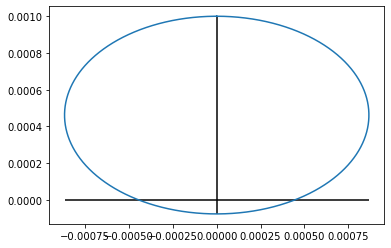

In [244]:
plt.plot(perts[0],perts[1])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,vmi,vma,colors="k")

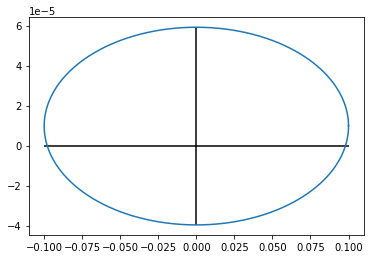

In [56]:
plt.plot(perts[0],perts[2])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,bmi,bma,colors="k")

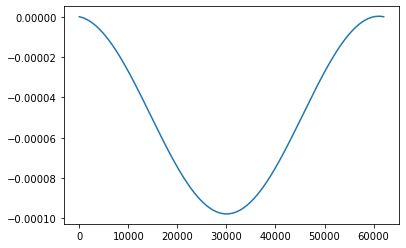

In [27]:
plt.plot(perts[2])
# plt.gca().set_aspect('equal')

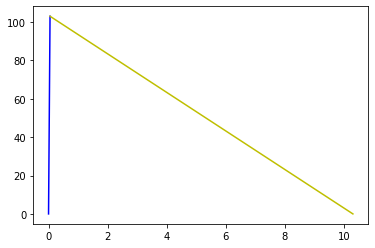

In [12]:
z = np.arange(0,h+1,1)
# plt.plot(vprofile,z,color="r")
vprofile = Vinf-gamma*theta*N2/f*(h-z)
plt.plot(vprofile,z,color="b")
plt.plot(vprofile+perts[1][-1]*(h-z),z,c="y")
# plt.ylim([0,1])

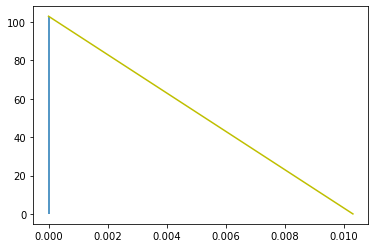

In [13]:
# plt.plot(vprofile,z,color="r")
uprofile = h*uo*np.ones(np.size(z))
# plt.plot(uprofile,z,color="b")
plt.plot(perts[0][0]*(h-z),z,c="y")
plt.vlines(0,0,h)
# plt.ylim([0,1])

In [14]:
gamma1
Sinf21

0.00025

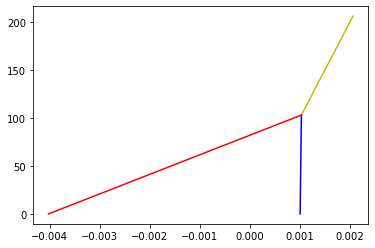

In [15]:
bint = N2*(h+z)+N2*theta*100
bprofile = N2*z+gamma*N2*(h-z)+N2*theta*100
plt.plot(bint,z+h,"y")
plt.plot(bprofile,z,c="b")
plt.plot(bprofile+perts[2][15515]*(h-z),z,c="r")
# plt.ylim([99,111])

In [16]:
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo
# omega_min = np.sqrt(PV/N2)
PV

5.000000000000001e-09

In [17]:
fstar

0.00010124228365658294